# PROJECT_PART_3

We want to perform regression to predict the output. We need to split the input into train and test. We will report the results of the test data.

Please measure the coefficient of determination (R2 score) for different dataset attributes. Also, visualize the results by scatter plots. Show whether the correlation measures we did in the previous part of the project verify the R2 scores of the regression results.

TEAM 04:

- Priyadarshini Shanmugasundaram Murugan,
- Priyanka Vysyaraju,
- Archana Janardhana Vinoda Kumari

## Regression for Predicting Cognitive Decline
The task is to predict cognitive decline using machine learning regression techniques. We will target
variables for regression include clinical measures like "cdrsb.bl," "adas11.bl," and "mmse.bl," which
assess the severity of dementia and cognitive impairment. Demographic and clinical features serve as
input variables. Regression models, such as linear regression or decision trees, are trained on labelled
datasets to learn the relationship between input features and cognitive decline scores. We might
evaluate model performance using metrics like mean squared error, and the trained model can provide
insights into the factors influencing cognitive deterioration. Our ultimate goal is to apply the model to
new data for early identification and intervention in individuals at risk of cognitive decline.

## Loading the data

In [26]:
# you need   Python ≥3.5 
import sys
assert sys.version_info >= (3, 5)
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [27]:
import pandas as pd

# Load the dataset
file_path = 'Alzhiemer.csv'
df = pd.read_csv(file_path, encoding='ascii')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
# Display the first few rows of the dataframe
print(df.head())

  origprot        ptid dxbl  dx  month  m   age ptgender  pteducat  \
0    ADNI1  137_S_0438   AD  AD      0  0  81.9     Male        11   
1    ADNI2  116_S_4209   AD  AD      0  0  77.7   Female        19   
2    ADNI1  109_S_0777   AD  AD      0  0  75.1   Female         7   
3    ADNI2  068_S_5206   AD  AD      0  0  85.2     Male        20   
4    ADNI1  013_S_0592   AD  AD      0  0  77.9     Male        19   

          ptethcat ptraccat   ptmarry  cdrsb.bl  adas11.bl  adas13.bl  \
0  Not Hisp/Latino    White   Married       4.0      15.67      29.67   
1  Not Hisp/Latino    White   Married       4.0      20.00      32.00   
2  Not Hisp/Latino    Black  Divorced       3.5      18.33      28.33   
3  Not Hisp/Latino    Black   Married       2.0      21.00      32.00   
4  Not Hisp/Latino    White   Married       3.5      23.67      35.67   

   mmse.bl  ravlt.immediate.bl  ravlt.learning.bl  ravlt.forgetting.bl  \
0       25                  19                  1                 

## Feature Selection

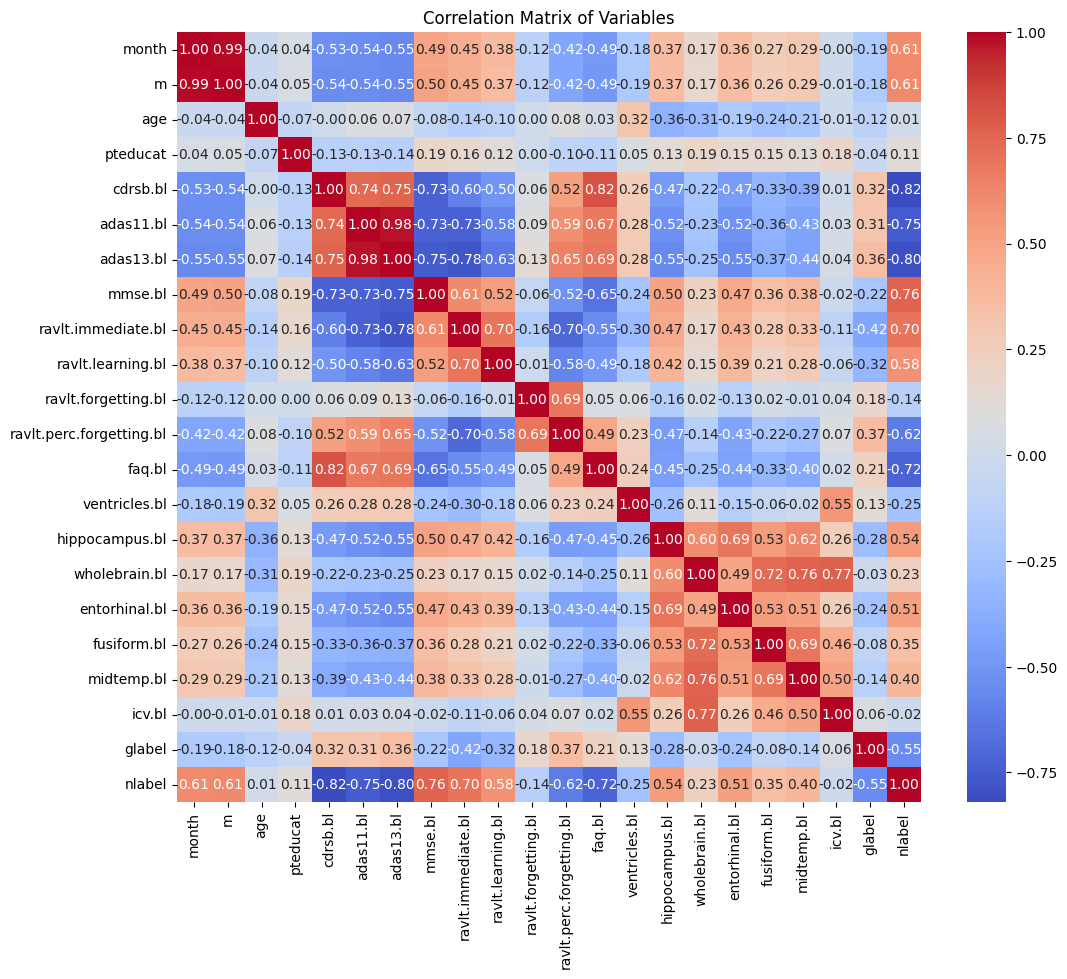

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Selecting numerical columns for correlation analysis
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Calculate correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10), facecolor='white')
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Variables')
plt.show()

The target variable should have a strong clinical relevance to Alzheimer's disease and cognitive decline.  Ideally, the target variable should exhibit significant correlations with multiple features, indicating that these features could be predictive of changes in the target variable. Given these considerations, MMSE (Mini-Mental State Examination) scores (mmse.bl) often serve as a standard measure of cognitive function in Alzheimer's disease research and have a broad range of clinical relevance.

In [29]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Selecting features and target variable
X = df.drop(df.select_dtypes(include=['object']).columns, axis=1)
y = df['mmse.bl']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Feature selection
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X_scaled, y)

# Get the scores for each feature
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

print(feature_scores.head(6))

               Feature        Score
21              nlabel  1164.828135
6            adas13.bl  1102.439446
4             cdrsb.bl   953.707326
5            adas11.bl   947.512945
12              faq.bl   621.763180
8   ravlt.immediate.bl   502.683126


These features were selected based on their statistical significance in relation to the target variable, which is the MMSE baseline score (mmse.bl). This selection indicates that these variables are potentially strong predictors of cognitive decline and should be considered in the regression analysis.

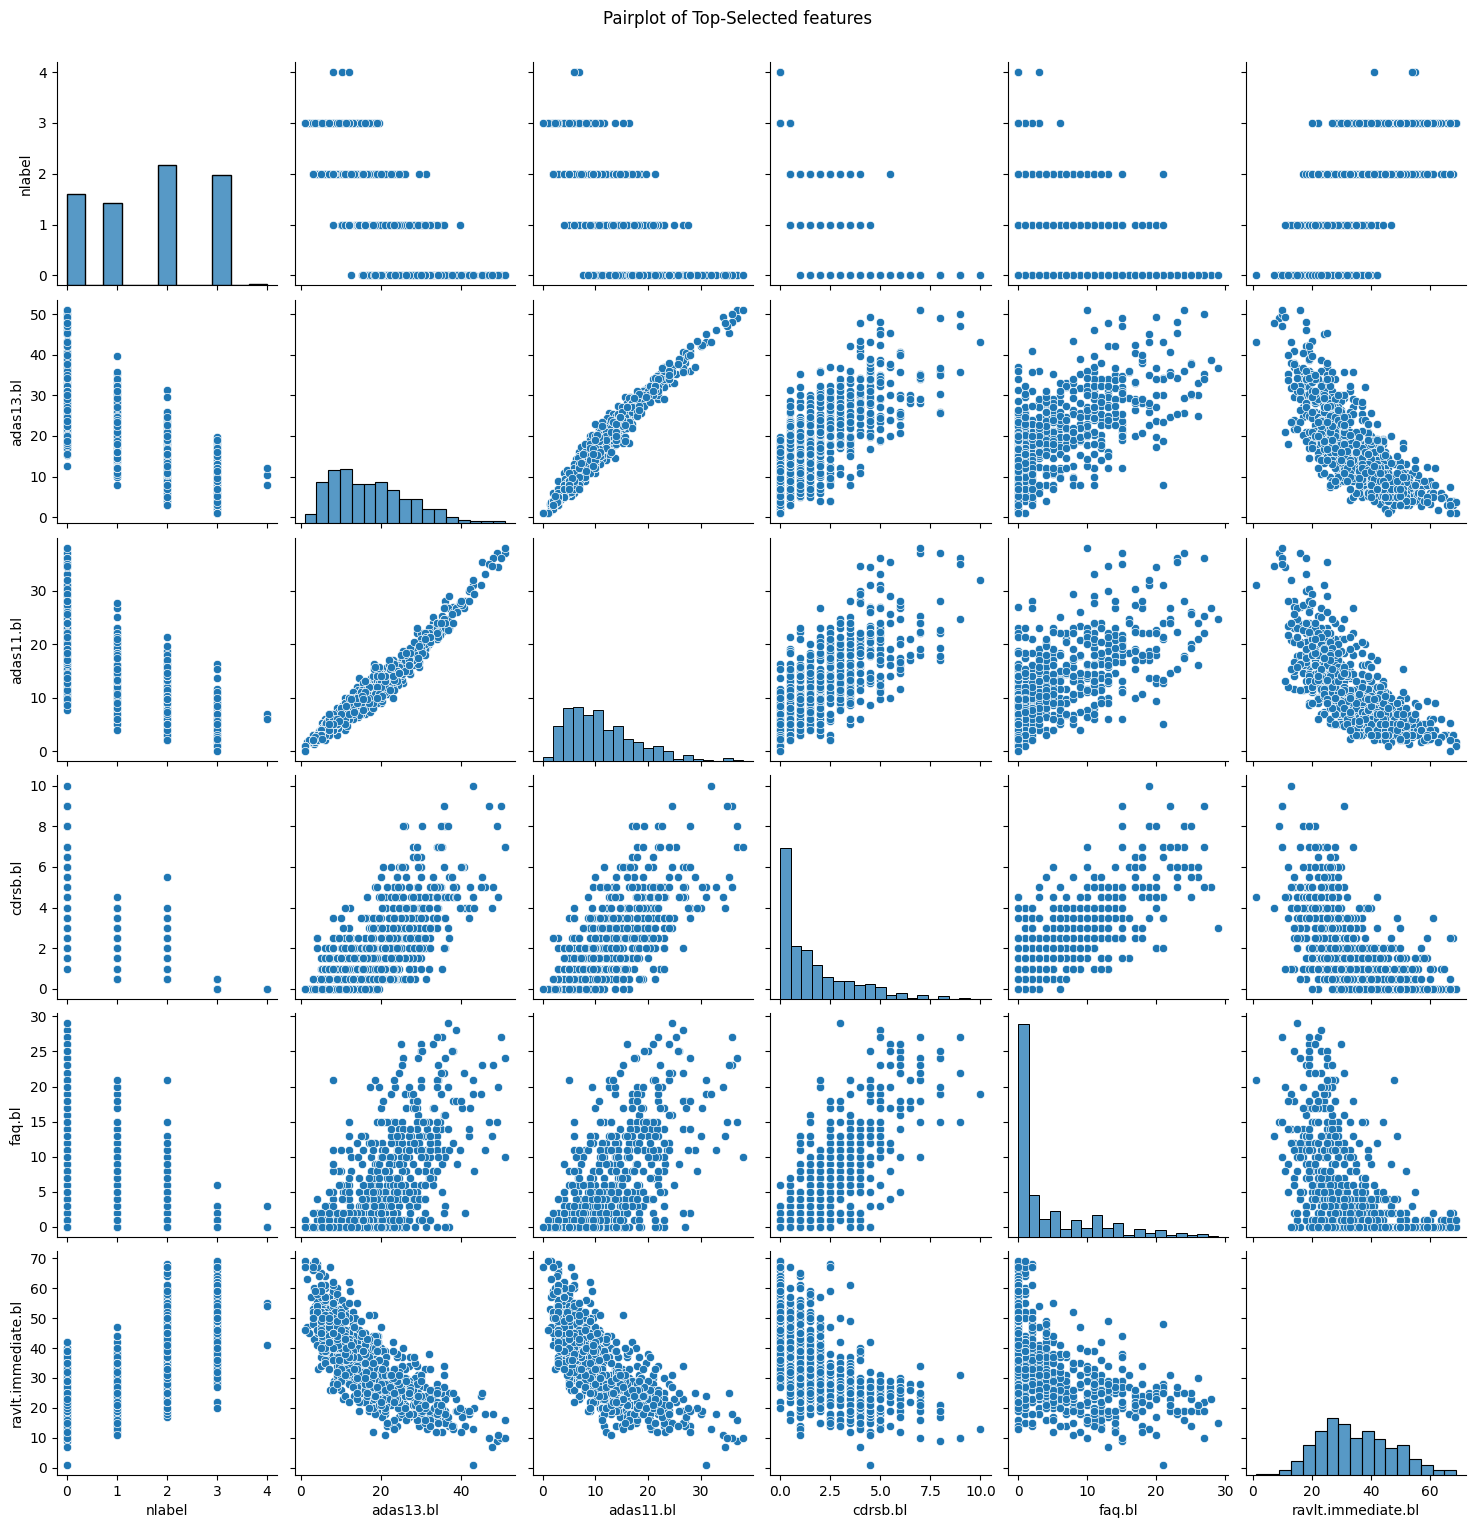

In [30]:
# Selecting the top 6 features for the model
top_features = ['nlabel', 'adas13.bl', 'adas11.bl', 'cdrsb.bl', 'faq.bl', 'ravlt.immediate.bl']

sns.pairplot(df[top_features])
plt.suptitle('Pairplot of Top-Selected features', y=1.02)
plt.show()

## Regression Models

### Linear Regression 

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Extracting the top features from the training and testing sets
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

# Initializing and training the Linear Regression model
model = LinearRegression()
model.fit(X_train_selected, y_train)

# Predicting the MMSE scores on the testing set
y_pred = model.predict(X_test_selected)

# Calculating the model performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Model Performance Metrics:")
print("--------------------------------------------")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Linear Regression Model Performance Metrics:
--------------------------------------------
Mean Squared Error (MSE): 2.947025305616605
Root Mean Squared Error (RMSE): 1.716690218302826
R-squared (R2): 0.6439088365774776


Linear Regression Model shows moderate predictive power with an R-squared value of 0.6439, indicating that approximately 64.39% of the variance in the target variable can be explained by the model. The RMSE of 1.7166 suggests that the model's predictions are, on average, within approximately 1.71 units of the actual values.

### Random Forest Regressor

In [32]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the models
rf_model.fit(X_train_selected, y_train)

# Predict on the testing set
y_pred_rf = rf_model.predict(X_test_selected)

# Calculate the performance metrics for Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor Model Performance Metrics:")
print("-------------------------------------------------")
print("Mean Squared Error (MSE):", mse_rf)
print("Root Mean Squared Error (RMSE):", rmse_rf)
print("R-squared (R2):", r2_rf)


Random Forest Regressor Model Performance Metrics:
-------------------------------------------------
Mean Squared Error (MSE): 2.7870770520833332
Root Mean Squared Error (RMSE): 1.6694541179928646
R-squared (R2): 0.6632354977973569


Random Forest Regressor outperforms the Linear Regression model with a higher R-squared value of 0.6632, meaning it can explain about 66.32% of the variance. Its RMSE is lower at 1.6694, indicating more accurate predictions on average.

### Support Vector Regression 

In [33]:
from sklearn.svm import SVR

# Initialize the models
svr_model = SVR()

# Fit the models
svr_model.fit(X_train_selected, y_train)

# Predict on the testing set
y_pred_svr = svr_model.predict(X_test_selected)

# Calculate the performance metrics for SVR
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("Support Vector Regression Model Performance Metrics:")
print("---------------------------------------------------")
print("Mean Squared Error (MSE):", mse_svr)
print("Root Mean Squared Error (RMSE):", rmse_svr)
print("R-squared (R2):", r2_svr)

Support Vector Regression Model Performance Metrics:
---------------------------------------------------
Mean Squared Error (MSE): 3.1753754217380843
Root Mean Squared Error (RMSE): 1.7819583108866728
R-squared (R2): 0.6163171296578274


Support Vector Regression (SVR) Model has significantly lower performance compared to the other two models, with an R-squared value of 0.6163. This suggests that it can only explain about 61.63% of the variance in the target variable, and its higher RMSE of 1.7819 indicates less accurate predictions.

### Ridge Regression

In [34]:
from sklearn.linear_model import Ridge

# Initialize the Ridge Regression model with regularization parameter alpha
ridge_model = Ridge(alpha=1.0)  # You can adjust the value of alpha as needed

# Fit the Ridge Regression model
ridge_model.fit(X_train_selected, y_train)

# Predict on the testing set
y_pred_ridge = ridge_model.predict(X_test_selected)

# Calculate the performance metrics for Ridge Regression
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression Model Performance Metrics:")
print("--------------------------------------------")
print("Mean Squared Error (MSE):", mse_ridge)
print("Root Mean Squared Error (RMSE):", rmse_ridge)
print("R-squared (R2):", r2_ridge)


Ridge Regression Model Performance Metrics:
--------------------------------------------
Mean Squared Error (MSE): 2.945897557863121
Root Mean Squared Error (RMSE): 1.7163617211599427
R-squared (R2): 0.6440451031405166


Ridge Regression Model has similar performance to the Linear Regression model, with an R-squared value of 0.644. This suggests that it can only explain about 64.4% of the variance in the target variable, and its higher RMSE of 1.716 indicates less accurate predictions.

Text(0, 0.5, 'Predicted')

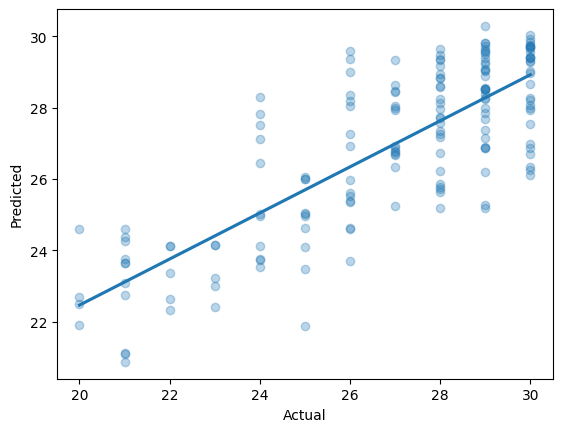

In [35]:
alpha=0.3
sns.regplot(x=y_test,y=y_pred,ci=None,scatter_kws=dict(alpha =alpha))
plt.xlabel('Actual')
plt.ylabel('Predicted')

Given these insights, the Random Forest Regressor appears to be the most promising model for this task, balancing predictive accuracy and the ability to explain variance in the target variable. 

## Feature Analysis

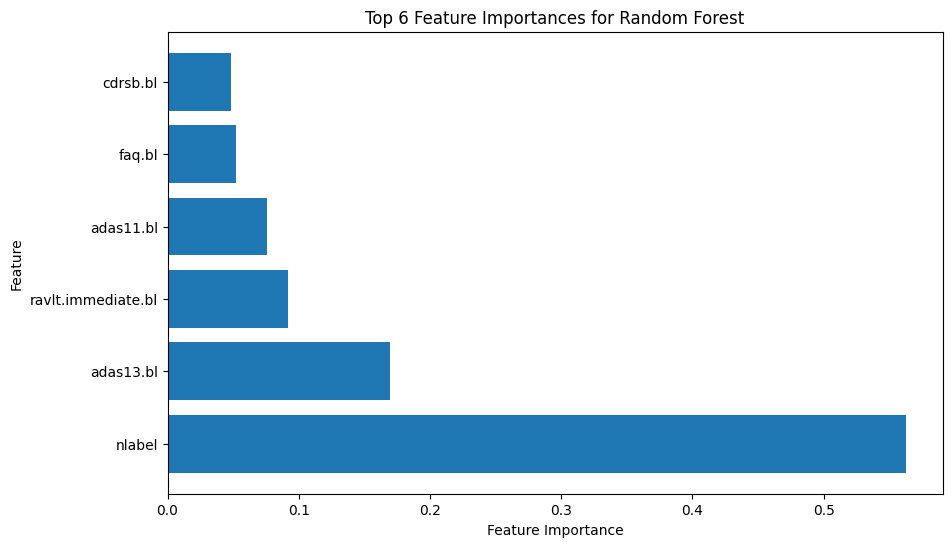

In [36]:
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = rf_model.feature_importances_

# Get the indices of the top k most important features
k = 6  # You can adjust this value as needed
top_k_indices = feature_importances.argsort()[-k:][::-1]

# Get the names of the top k most important features
top_k_features = [X_train_selected.columns[i] for i in top_k_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_k_indices)), feature_importances[top_k_indices], align='center')
plt.yticks(range(len(top_k_indices)), top_k_features)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top {} Feature Importances for Random Forest'.format(k))
plt.show()


Performing the feature importance analysis for the Random Forest Model, we can see that 'nlabel' is the most effective feature to predict the cognitive decline among the top 10 features selected for prediction.

In [37]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X_train_selected, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive
cv_scores = -cv_scores

# Calculate mean and standard deviation of cross-validation scores
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

print("Cross-Validation Mean Squared Error (MSE):", mean_cv_score)
print("Cross-Validation Standard Deviation:", std_cv_score)


Cross-Validation Mean Squared Error (MSE): 2.6480368734237043
Cross-Validation Standard Deviation: 0.2755905206618596


Performing cross-validation techniques ensure that the results are robust and not overly sensitive to the specific training-test split.

These cross-validation results indicate that the mean squared error (MSE) of the Random Forest model is approximately 2.648, with a standard deviation of around 0.275. This suggests that, on average, the model's predictions are off by this amount from the actual values. 

**Conculsion**: 
     Through exploratory analysis and modeling, we identified several clinical measures as strong predictors of cognitive decline, with 'nlabel' having the highest feature importance. Linear regression achieved moderate predictive accuracy, but random forest regressor emerged as the best performer with its ability to capture nuances in the data. Cross-validation demonstrated model robustness, with low variance across folds. In summary, the random forest model leveraging key demographic and clinical variables provides meaningful insights into tracing cognitive deterioration. Further refinement through expanded datasets and regularized models can enhance generalizability. Overall, the analysis workflow and features identified create a foundation to build an effective screening tool for early interventions to mitigate dementia progression.

**Reflection**: 
During this phase of the project, we encountered both key learnings and difficulties. We learned the importance of thorough data exploration, model optimization, and rigorous evaluation in machine learning. Navigating complex datasets and selecting impactful variables required careful consideration and analytical thinking. Tuning algorithms to avoid overfitting while maintaining model performance was challenging but crucial. Interpreting sophisticated models also proved difficult but highlighted the need for clear, actionable insights. Overall, we gained a deeper understanding of the complexities involved in applying machine learning to real-world healthcare data and the importance of methodical approaches to overcome challenges.